In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from scipy import stats
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
%matplotlib inline

In [189]:
data = pd.read_csv('./data/sh_price.csv')
data.head()

,name,loc,size,area,price,price_sum,dire,floor,buildtime,advantage
0,新高苑,高行-新高苑高宝路229弄、高宝路379弄、高宝路,2室2厅,87.81,41567,365.0,南向,低层（共11层）,2008年建,满二优质教育
1,光鸿苑,南码头-东三里桥路245弄1-18号、临沂路8弄1-,3室2厅,137,51095,700.0,南北向,高层（共31层）,2001年建,满五优质教育性价比高业主急售\r\n ...
2,金都安亭家园,昆山-曹新路88号,2室2厅,69,10870,75.0,南北向,中层（共11层）,2005年建,满五优质教育配套成熟小区中心
3,太浜巷小区,光新-岚皋路200弄、岚皋路166弄、中山北路赵家,2室1厅,64.06,60100,385.0,南向,中层（共6层）,1986年建,满五配套成熟户型佳\r\n ...
4,佳兆业8号,南桥-佳兆业8号钜庭路99弄,3室2厅,120,25000,300.0,南向,中层（共5层）,2019年建,满五


In [192]:
data.isnull().sum().sort_values(ascending=False)

buildtime    131
advantage      0
floor          0
dire           0
price_sum      0
price          0
area           0
size           0
loc            0
name           0
dtype: int64

In [193]:
data.shape

(5980, 10)

In [194]:
data.describe()

,price,price_sum
count,5980.000000,5980.000000
mean,55186.723579,754.917316
std,32097.385076,1360.330520
min,7086.000000,27.500000
25%,34948.000000,257.750000
50%,46821.000000,385.000000
75%,65783.750000,700.000000
max,314381.000000,46500.000000


In [195]:
# 缺失值处理
data['buildtime'] = data['buildtime'].str.extract('(\d+).*')
data['buildtime'].isnull().sum()

340

In [196]:
# 没有朝向的有214
d = data['dire'].str.extract('(\d+).*').notnull().sum()
d

0    214
dtype: int64

In [197]:
# 观察数据发现朝向不正确的没有建造年份的有214个，一般都是朝向写进了建造年份;
# 另外朝向正确的有126是没有建造日期的，故214+126 = 340，占总数为340/5980=5.69%
# 由于异常值占比小于10%,因此将这些空值以及异常值都剔除
data.dropna(axis=0,inplace=True)

In [198]:
data.isnull().sum().sort_values(ascending=False)

advantage    0
buildtime    0
floor        0
dire         0
price_sum    0
price        0
area         0
size         0
loc          0
name         0
dtype: int64

In [199]:
# 数据空值及异常值清洗完毕，数据大小为(5640, 10)
data.shape

(5640, 10)

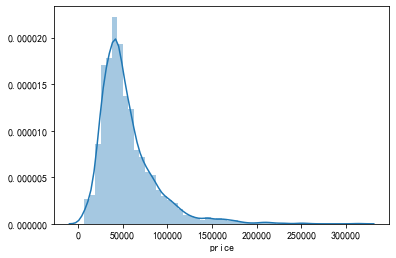

In [200]:
#  我们来看下单价的分布
sns.distplot(data['price'])

In [201]:
# 上图属于正偏分布，其偏度为2.06418
data['price'].skew()

2.0641840643568283

In [202]:
# 峰度为
data['price'].kurt()

6.918070294151985

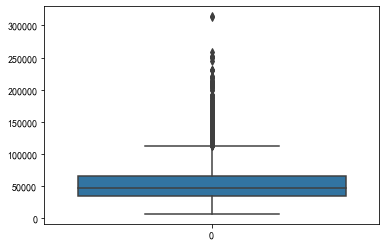

In [203]:
# 观察price的箱型图，发现单价中位值在5W左右，部分离群点大于12万
sns.boxplot(data=data['price'])

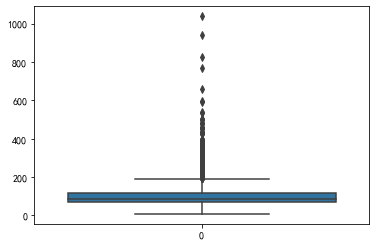

In [204]:
sns.boxplot(data=data['area'])

In [67]:
data[data['price']>100000] #观察单价大于150000，均是非常高档的小区

,name,loc,size,area,price,price_sum,dire,floor,buildtime,advantage
32,翠湖天地御苑,新天地-翠湖天地御苑顺昌路168弄,4室2厅,280,171429,4800.0,南向,中层（共30层）,2006,满二优质教育\r\n ...
35,西康路989,长寿路-西康路989弄,2室2厅,89.3,108623,970.0,南向,高层（共34层）,2012,满二\r\n ...
51,中粮海景壹号,陆家嘴-银城中路600弄,4室3厅,393.36,249136,9800.0,东向,中层（共39层）,2010,满二配套成熟户型佳\r\n ...
61,中粮海景壹号,陆家嘴-银城中路600弄,4室2厅,347,210375,7300.0,东向,高层（共39层）,2009,满二\r\n ...
73,中粮海景壹号,陆家嘴-银城中路600弄,4室2厅,320.65,230251,7383.0,东西向,高层（共35层）,2009,满二配套成熟户型佳\r\n ...
...,...,...,...,...,...,...,...,...,...,...
5910,世茂滨江花园,陆家嘴-世茂滨江花园潍坊西路1弄、潍坊西路2弄,4室2厅,283,116608,3300.0,东向,高层（共62层）,2004,满二\r\n ...
5918,梅园三街坊,源深-商城路991弄、商城路1025弄、乳山路13,1室1厅,33,120606,398.0,南向,中层（共6层）,1985,满二优质教育\r\n ...
5923,世茂滨江花园,陆家嘴-潍坊西路1弄、潍坊西路2弄,3室2厅,236.95,111838,2650.0,东向,低层（共54层）,2004,满二\r\n ...
5926,华府天地,新天地-华府天地马当路222弄,4室2厅,301.23,174285,5250.0,东向,低层（共17层）,2005,满二优质教育\r\n ...


In [205]:
# 有些房子的建成时间存在异常，例如2020,2019，将这些删除
index = data[data['buildtime'].isin(['2019','2020'])].index
data.drop(index,inplace=True)
data['buildtime'].unique()

array(['2008', '2001', '2005', '1986', '1997', '1994', '2013', '2003',
       '2016', '2000', '1991', '2017', '1990', '1974', '2015', '2007',
       '1987', '2012', '2006', '2011', '1985', '2009', '2014', '1996',
       '2010', '1999', '2004', '1995', '1989', '2002', '1992', '1993',
       '1983', '1984', '1998', '1982', '2018', '1981', '1979', '1988',
       '1978', '1980', '1957', '1929', '1936', '1975', '1935', '1960'],
      dtype=object)

In [206]:
data.shape

(5565, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

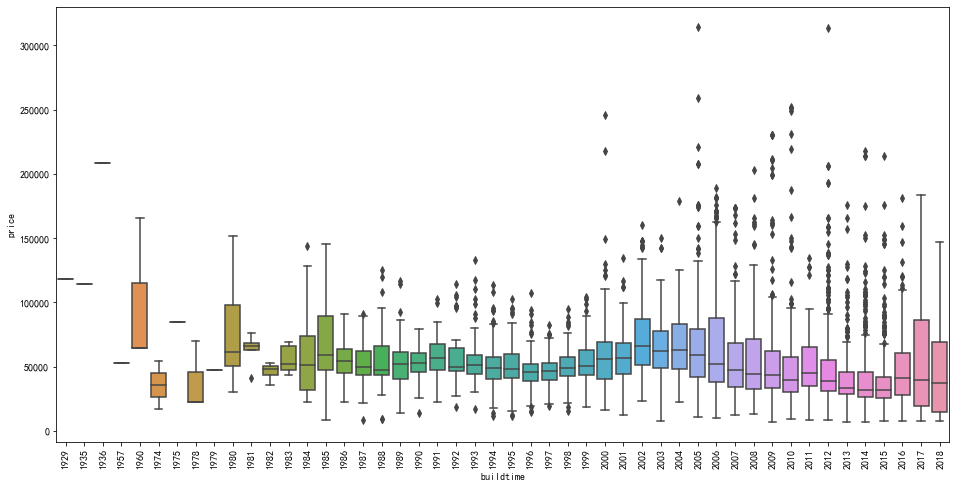

In [207]:
# 建造时间，总体看年份越老的房子越吃香
df = pd.concat([data['price'],data['buildtime']],axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x='buildtime',y='price',data=df)
# fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

In [208]:
data['dire'].unique() #  朝向值无异常

array(['南向', '南北向', '东向', '东西向', '东南向', '西北向', '西向', '西南向', '东北向', '北向'],
      dtype=object)

In [209]:
data['floor'].unique()   # 楼层数据较正常

array(['低层（共11层）', '高层（共31层）', '中层（共11层）', '中层（共6层）', '高层（共6层）',
       '中层（共18层）', '高层（共11层）', '中层（共17层）', '中层（共15层）', '高层（共7层）',
       '低层（共6层）', '中层（共20层）', '中层（共4层）', '高层（共18层）', '中层（共5层）',
       '高层（共25层）', '高层（共1层）', '中层（共8层）', '中层（共3层）', '低层（共12层）',
       '中层（共30层）', '高层（共22层）', '高层（共34层）', '高层（共27层）', '低层（共18层）',
       '高层（共16层）', '低层（共27层）', '中层（共28层）', '中层（共39层）', '低层（共17层）',
       '低层（共15层）', '中层（共25层）', '高层（共17层）', '高层（共39层）', '中层（共21层）',
       '低层（共21层）', '高层（共35层）', '高层（共50层）', '低层（共4层）', '低层（共30层）',
       '低层（共5层）', '中层（共23层）', '中层（共16层）', '高层（共20层）', '低层（共38层）',
       '高层（共14层）', '低层（共24层）', '高层（共15层）', '中层（共14层）', '中层（共33层）',
       '中层（共31层）', '低层（共39层）', '中层（共9层）', '高层（共24层）', '高层（共19层）',
       '高层（共12层）', '中层（共19层）', '中层（共7层）', '中层（共12层）', '高层（共36层）',
       '低层（共7层）', '高层（共4层）', '中层（共26层）', '高层（共29层）', '低层（共3层）', '高层（共5层）',
       '低层（共9层）', '低层（共42层）', '高层（共8层）', '低层（共13层）', '低层（共33层）',
       '高层（共28层）', '中层（共29层）', '中层（共42层）', '高层（共37层）', '中层（共13层）',
  

In [210]:
data['size'].unique()

array(['2室2厅', '3室2厅', '2室1厅', '5室1厅', '1室1厅', '4室2厅', '4室3厅', '3室1厅',
       '6室3厅', '1室2厅', '5室2厅', '5室3厅', '1室0厅', '2室0厅', '3室0厅', '6室2厅',
       '5室4厅', '3室3厅', '4室4厅', '2室3厅', '4室1厅', '8室2厅', '7室2厅', '8室3厅'],
      dtype=object)

In [211]:
# 房价与房屋面积大小关系
df = pd.concat([data['area'],data['price']],axis=1)
df

,area,price
0,87.81,41567
1,137,51095
2,69,10870
3,64.06,60100
5,58.62,52883
...,...,...
5975,242.81,86487
5976,89.9,75417
5977,137.13,91154
5978,67.1,46200


In [212]:
data['area'] = data['area'].astype(float)
data['buildtime'] = data['buildtime'].astype(int)
data.dtypes

name          object
loc           object
size          object
area         float64
price          int64
price_sum    float64
dire          object
floor         object
buildtime      int32
advantage     object
dtype: object

In [213]:
data[(data['area']<100) & (data['price']>150000)]

,name,loc,size,area,price,price_sum,dire,floor,buildtime,advantage
1473,翠湖天地嘉苑,新天地-翠湖天地嘉苑黄陂南路506弄,1室2厅,90.00,162778,1465.0,南向,中层（共29层）,2008,满五优质教育\r\n ...
4914,岳阳路77弄小区,建国西路-岳阳路77弄,1室1厅,35.36,151301,535.0,南向,高层（共6层）,1980,满五优质教育首付低总价低\r\n ...


d:\virtualenv\hp_pre\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


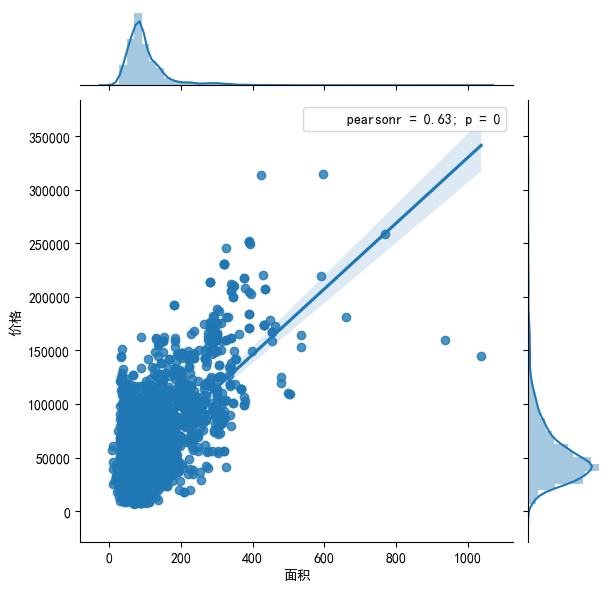

In [214]:
# 结果可见价格与面积之间有一定的正相关关系
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
g=sns.jointplot(x='area',y='price',data=data, kind='reg' ,stat_func=stats.pearsonr)
g.fig.set_dpi(100)
g.ax_joint.set_xlabel('面积', fontweight='bold')
g.ax_joint.set_ylabel('价格', fontweight='bold')
g

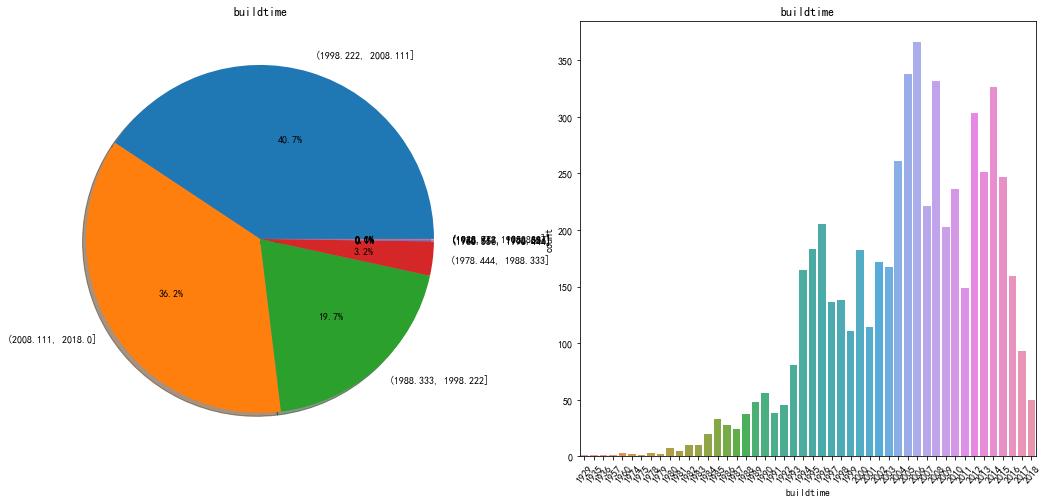

In [215]:
#  分析建造时间，1988年以后建造的房子居多，上海也是从那个时候开始发展
f,ax = plt.subplots(1,2,figsize=(18,8))
data['buildtime'].value_counts(bins=9).plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('buildtime')
ax[0].set_ylabel('')
sns.countplot('buildtime',data=data,ax=ax[1])
ax[1].set_title('buildtime')
plt.xticks(rotation=50)
plt.show()

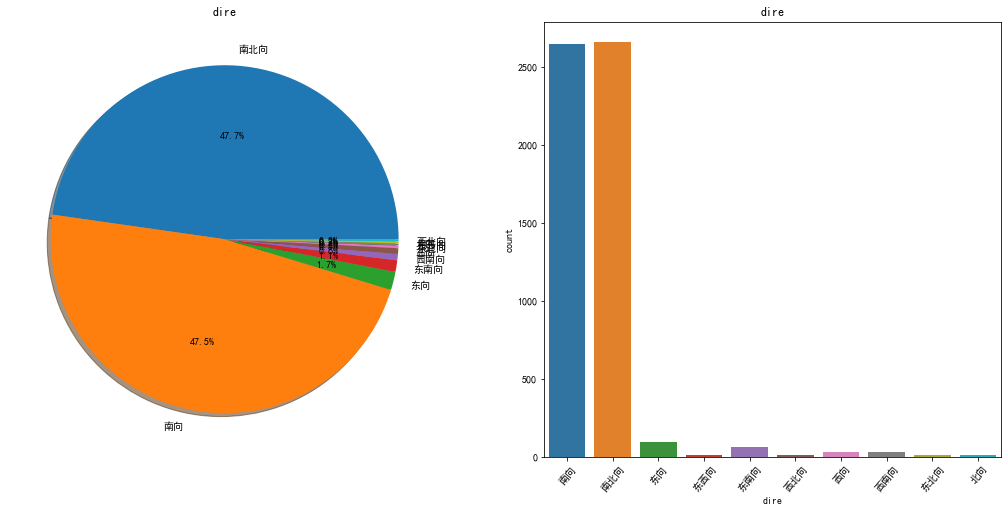

In [216]:
#  分析朝向，南向以及南北向的较多约95%
f,ax = plt.subplots(1,2,figsize=(18,8))
data['dire'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dire')
ax[0].set_ylabel('')
sns.countplot('dire',data=data,ax=ax[1])
ax[1].set_title('dire')
plt.xticks(rotation=50)
plt.show()

In [217]:
# 重置索引
data = data.reset_index(drop=True)

In [243]:
import jieba
for i in range(len(data)):
        words=list(jieba.cut(data.loc[i,'advantage']))
        if '满二' in words:
            data.loc[i,'exemption of business tax']=1
        else:
            data.loc[i,'exemption of business tax']=0
        if '满五' in words:
            data.loc[i,'exemption of double tax']=1
        else:
            data.loc[i,'exemption of double tax']=0
        if '教育' in words:
            data.loc[i,'quality education']=1
        else:
            data.loc[i,'quality education']=0
data.head()

,name,loc,size,area,price,price_sum,dire,floor,buildtime,advantage,exemption of business tax,exemption of double tax,quality education,distance
0,新高苑,高行,2室2厅,87.81,41567,365.0,南向,低层（共11层）,2008,满二优质教育,1.0,0.0,1.0,NaN
1,光鸿苑,南码头,3室2厅,137.00,51095,700.0,南北向,高层（共31层）,2001,满五优质教育性价比高业主急售\r\n ...,0.0,1.0,1.0,680
2,金都安亭家园,昆山,2室2厅,69.00,10870,75.0,南北向,中层（共11层）,2005,满五优质教育配套成熟小区中心,0.0,1.0,1.0,NaN
3,太浜巷小区,光新,2室1厅,64.06,60100,385.0,南向,中层（共6层）,1986,满五配套成熟户型佳\r\n ...,0.0,1.0,0.0,495
4,春申五村,春申,2室1厅,58.62,52883,310.0,南向,高层（共6层）,1997,优质教育总价低业主急售\r\n ...,0.0,0.0,1.0,776


In [244]:
dire_sum=list(data['dire'].unique())
dire_sum

['南向', '南北向', '东向', '东西向', '东南向', '西北向', '西向', '西南向', '东北向', '北向']

In [245]:
new_data=pd.DataFrame()
new_data['area']=data['area']
new_data['buildtime']=data['buildtime']
for i in range(len(data)):
        s=re.findall('\d+',data.loc[i,'size'])
        new_data.loc[i,'room_num']=float(s[0])
        new_data.loc[i,'hall_num']=float(s[1])
        
        if '低层' in data.loc[i,'floor']:
            new_data.loc[i,'floor']=1
        elif '中层' in data.loc[i,'floor']:
            new_data.loc[i,'floor']=2
        elif '高层' in data.loc[i,'floor']:
            new_data.loc[i,'floor']=3
        dire=data.loc[i,'dire']
        idx=dire_sum.index(dire)+1
        new_data.loc[i,'dire']=idx 
new_data['exemption of business tax']=data['exemption of business tax']
new_data['exemption of double tax']=data['exemption of double tax']
new_data['quality education']=data['quality education']
new_data.head()

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education
0,87.81,2008,2.0,2.0,1.0,1.0,1.0,0.0,1.0
1,137.00,2001,3.0,2.0,3.0,2.0,0.0,1.0,1.0
2,69.00,2005,2.0,2.0,2.0,2.0,0.0,1.0,1.0
3,64.06,1986,2.0,1.0,2.0,1.0,0.0,1.0,0.0
4,58.62,1997,2.0,1.0,3.0,1.0,0.0,0.0,1.0


In [246]:
distance = []
station = []
for i in range(len(data)):
    s=re.findall('\d+',data.loc[i,'advantage'])#用正则表达式匹配advantage标签
    if len(s)==2:
        distance.append(s[1])#距离
        station.append(s[0])#站线
        data.loc[i,'distance']=s[1]
new_data['distance'] = data['distance']
new_data.head()                    

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance
0,87.81,2008,2.0,2.0,1.0,1.0,1.0,0.0,1.0,NaN
1,137.00,2001,3.0,2.0,3.0,2.0,0.0,1.0,1.0,680
2,69.00,2005,2.0,2.0,2.0,2.0,0.0,1.0,1.0,NaN
3,64.06,1986,2.0,1.0,2.0,1.0,0.0,1.0,0.0,495
4,58.62,1997,2.0,1.0,3.0,1.0,0.0,0.0,1.0,776


In [247]:
new_data['distance'].isnull().sum()

2149

In [248]:
new_data['distance'].fillna(5000,inplace=True)
new_data.head()

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance
0,87.81,2008,2.0,2.0,1.0,1.0,1.0,0.0,1.0,5000
1,137.00,2001,3.0,2.0,3.0,2.0,0.0,1.0,1.0,680
2,69.00,2005,2.0,2.0,2.0,2.0,0.0,1.0,1.0,5000
3,64.06,1986,2.0,1.0,2.0,1.0,0.0,1.0,0.0,495
4,58.62,1997,2.0,1.0,3.0,1.0,0.0,0.0,1.0,776


In [249]:
for i in range(len(data)):
    data.loc[i,'loc'] = data['loc'][i].split('-')[0]
data.head()

,name,loc,size,area,price,price_sum,dire,floor,buildtime,advantage,exemption of business tax,exemption of double tax,quality education,distance
0,新高苑,高行,2室2厅,87.81,41567,365.0,南向,低层（共11层）,2008,满二优质教育,1.0,0.0,1.0,NaN
1,光鸿苑,南码头,3室2厅,137.00,51095,700.0,南北向,高层（共31层）,2001,满五优质教育性价比高业主急售\r\n ...,0.0,1.0,1.0,680
2,金都安亭家园,昆山,2室2厅,69.00,10870,75.0,南北向,中层（共11层）,2005,满五优质教育配套成熟小区中心,0.0,1.0,1.0,NaN
3,太浜巷小区,光新,2室1厅,64.06,60100,385.0,南向,中层（共6层）,1986,满五配套成熟户型佳\r\n ...,0.0,1.0,0.0,495
4,春申五村,春申,2室1厅,58.62,52883,310.0,南向,高层（共6层）,1997,优质教育总价低业主急售\r\n ...,0.0,0.0,1.0,776


In [250]:
data['loc'].unique()

array(['高行', '南码头', '昆山', '光新', '春申', '塘桥', '嘉兴', '康健', '顾村', '南桥', '曲阳',
       '杨行', '新天地', '临平路', '长寿路', '嘉定城区', '天山', '重固', '青浦城区', '华新', '曹杨',
       '泗泾', '罗店', '金桥', '陆家嘴', '中原', '北新泾', '曹家渡', '金山新城', '御桥', '黄兴公园',
       '徐泾', '浦江', '莘庄', '淞宝', '康桥', '东外滩', '古北', '临港新城', '北蔡', '古美',
       '金杨', '惠南', '世博', '华漕', '不夜城', '白鹤', '田林', '张江', '西藏北路', '大宁',
       '颛桥', '杨东', '三林', '花木', '江宁路', '马桥', '奉城', '江桥', '嘉定新城', '周浦',
       '高境', '万里', '海湾旅游区', '华泾', '松江老城', '江湾镇', '金山其他', '虹桥', '航头', '凉城',
       '唐镇', '长征', '共康', '大华', '月浦', '赵巷', '金汇', '联洋', '植物园', '松江新城',
       '新江湾城', '新桥', '源深', '上大', '老西门', '淮海中路', '金虹桥', '世纪公园', '金汇镇',
       '西郊', '周家嘴路', '静安寺', '长桥', '曹路', '安亭', '大场镇', '长风', '通河', '蓬莱公园',
       '松江大学城', '九亭', '彭浦', '徐家汇', '洋泾', '黄浦滨江', '马陆', '共富', '老闵行', '董家渡',
       '佘山', '川沙', '五角场', '石化', '淞南', '龙柏', '闸北公园', '控江路', '新场', '静安新城',
       '万体馆', '徐汇滨江', '莘闵别墅', '上海南站', '鞍山', '龙华', '七宝', '南翔', '青浦新城',
       '西渡', '中山公园', '桃浦', '五里桥', '打浦桥', '真如', '梅陇', '其他', '车墩

In [251]:
loc_num = list(data['loc'].unique())

In [252]:
for i in range(len(data)):
    loc = data.loc[i,'loc']
    ldx = loc_num.index(loc)+1
    new_data.loc[i,'loc']=ldx
new_data.head(20)

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance,loc
0,87.81,2008,2.0,2.0,1.0,1.0,1.0,0.0,1.0,5000,1.0
1,137.00,2001,3.0,2.0,3.0,2.0,0.0,1.0,1.0,680,2.0
2,69.00,2005,2.0,2.0,2.0,2.0,0.0,1.0,1.0,5000,3.0
3,64.06,1986,2.0,1.0,2.0,1.0,0.0,1.0,0.0,495,4.0
4,58.62,1997,2.0,1.0,3.0,1.0,0.0,0.0,1.0,776,5.0
5,77.24,1994,2.0,1.0,2.0,1.0,0.0,1.0,0.0,210,6.0
6,64.00,2013,2.0,2.0,3.0,1.0,1.0,0.0,1.0,5000,3.0
7,150.50,2003,3.0,2.0,2.0,2.0,0.0,1.0,1.0,381,6.0
8,67.00,2016,2.0,2.0,2.0,1.0,1.0,0.0,0.0,5000,7.0
9,233.01,2000,5.0,1.0,3.0,2.0,0.0,1.0,1.0,357,6.0


In [254]:
new_data.to_csv('./data/new_data.csv')

In [255]:
new_data.isnull().sum()

area                         0
buildtime                    0
room_num                     0
hall_num                     0
floor                        0
dire                         0
exemption of business tax    0
exemption of double tax      0
quality education            0
distance                     0
loc                          0
dtype: int64

In [256]:
new_data['price'] = data['price']
new_data.head()

,area,buildtime,room_num,hall_num,floor,dire,exemption of business tax,exemption of double tax,quality education,distance,loc,price
0,87.81,2008,2.0,2.0,1.0,1.0,1.0,0.0,1.0,5000,1.0,41567
1,137.00,2001,3.0,2.0,3.0,2.0,0.0,1.0,1.0,680,2.0,51095
2,69.00,2005,2.0,2.0,2.0,2.0,0.0,1.0,1.0,5000,3.0,10870
3,64.06,1986,2.0,1.0,2.0,1.0,0.0,1.0,0.0,495,4.0,60100
4,58.62,1997,2.0,1.0,3.0,1.0,0.0,0.0,1.0,776,5.0,52883


In [257]:
new_data.to_csv('./data/data1.csv')

LinearRegression模型的R方得分为： 0.5687373525630215


Text(0.5, 1.0, '线性回归预测结果')

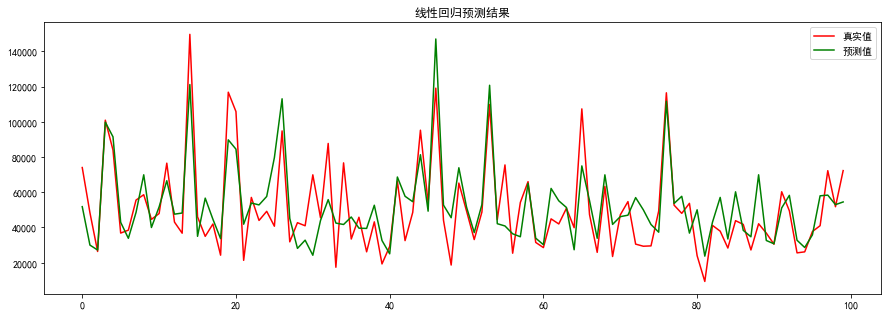

In [269]:
X = new_data.drop(["price"], axis=1)
y = new_data['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
#数据标准化处理 归一化
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()     #初始化
lr.fit(x_train, y_train)    #训练数据
lr_y_predict = lr.predict(x_test)   #回归预测
#性能测评：使用R方得分指标对模型预测结果进行评价
from sklearn.metrics import  r2_score
print("LinearRegression模型的R方得分为：", r2_score(y_test, lr_y_predict))

plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:100], "-r", label="真实值")
plt.plot(lr_y_predict[:100], "-g", label="预测值")
plt.legend()
plt.title("线性回归预测结果")

In [296]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,12)]
        
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,12)],
        'p':[i for i in range(1,6)]
    }
]
from sklearn.neighbors import KNeighborsRegressor
knnrgr = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knnrgr,param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [271]:
grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [297]:
grid_search.best_score_

0.6673636627832303

Text(0.5, 1.0, 'k近邻预测结果')

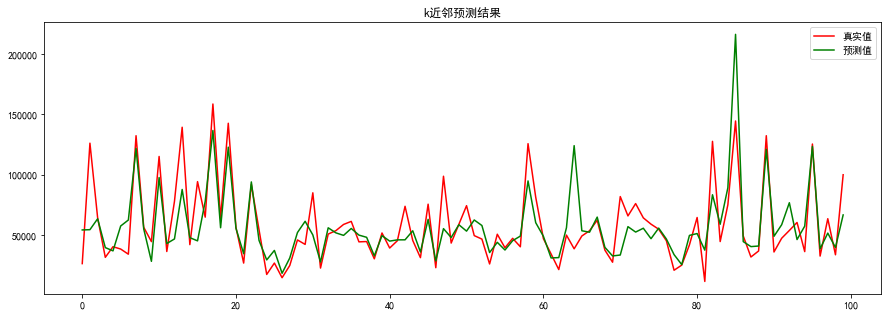

In [298]:
y_predict = grid_search.predict(x_test)
plt.figure(figsize=(15, 5))
plt.plot(y_test.values[100:200], "-r", label="真实值")
plt.plot(y_predict[100:200], "-g", label="预测值")
plt.legend()
plt.title("k近邻预测结果")

0.6542756744005986


Text(0.5, 1.0, 'k近邻预测结果')

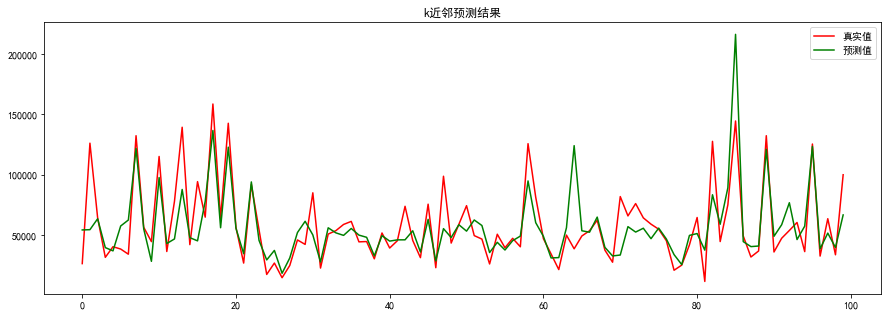

In [294]:
knnrgr = KNeighborsRegressor(n_neighbors=9,weights='distance',p=1)
knnrgr.fit(x_train,y_train)
print(knnrgr.score(x_test,y_test))
y_predict = knnrgr.predict(x_test)
plt.figure(figsize=(15, 5))
plt.plot(y_test.values[100:200], "-r", label="真实值")
plt.plot(y_predict[100:200], "-g", label="预测值")
plt.legend()
plt.title("k近邻预测结果")

In [274]:
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,Ridge,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
models = [Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),
GradientBoostingRegressor(),SVR(),ElasticNet(alpha=0.001,max_iter=10000),
SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),ExtraTreesRegressor(),
XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=False, objective='reg:gamma')]
names = [ "邻回归", "Lasso回归", "随机森林", "梯度提升树", "支持向量机" , "弹性网络","梯度下降回归","贝叶斯线性回归","L2正则线性回归","极端随机森林回归","Xgboost回归"]
for name, model in zip(names, models):
    model.fit(x_train,y_train)
    predicted= model.predict(x_test)
    print("{}: {:.6f}, {:.4f}".format(name,model.score(x_test,y_test),mean_squared_error(y_test, predicted)))

邻回归: 0.568766, 439421938.4655
Lasso回归: 0.568737, 439451108.5348
随机森林: 0.776423, 227821975.8825
梯度提升树: 0.712723, 292731434.8000
支持向量机: -0.061500, 1081654785.6822
弹性网络: 0.568797, 439390565.8432
梯度下降回归: 0.570275, 437884135.5191
贝叶斯线性回归: 0.568890, 439295561.0300
L2正则线性回归: 0.645165, 361572401.9905
极端随机森林回归: 0.789686, 214307220.5605
Xgboost回归: 0.717704, 287655597.7741


In [275]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5,n_jobs=-1)
        grid_search.fit(X,y)
        print(grid_search.best_params_, grid_search.best_score_)
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])
grid(Lasso()).grid_get(x_train,y_train,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.5613328036994616
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.561333          0.0409
1  {'alpha': 0.0005, 'max_iter': 10000}         0.561333          0.0409
2  {'alpha': 0.0007, 'max_iter': 10000}         0.561333          0.0409
3  {'alpha': 0.0006, 'max_iter': 10000}         0.561333          0.0409
4  {'alpha': 0.0009, 'max_iter': 10000}         0.561333          0.0409
5  {'alpha': 0.0008, 'max_iter': 10000}         0.561333          0.0409


In [276]:
grid(Ridge()).grid_get(x_train,y_train,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.5611491635426574
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.561149        0.040529
1  {'alpha': 40}         0.561081        0.040479
2  {'alpha': 45}         0.561002        0.040428
3  {'alpha': 50}         0.560915        0.040378
4  {'alpha': 55}         0.560819        0.040329
5  {'alpha': 60}         0.560714        0.040280
6  {'alpha': 65}         0.560601        0.040231
7  {'alpha': 70}         0.560480        0.040183
8  {'alpha': 80}         0.560216        0.040087
9  {'alpha': 90}         0.559922        0.039993


In [285]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
def r2(model,X,y):
    return cross_val_score(model, X, y, scoring="r2", cv=5)


class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w
        
lasso = Lasso(alpha=0.0009,max_iter=10000)
ridge = Ridge(alpha=35)
ker = KernelRidge(alpha=0.5 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.3,max_iter=10000)
bay = BayesianRidge()

w1 = 0.15 #按R2指标赋权
w2 = 0.15
w3 = 0.4
w4 = 0.15
w5 = 0.15

weight_avg = AverageWeight(mod = [lasso,ridge,ker,ela,bay],weight=[w1,w2,w3,w4,w5])
r2(weight_avg,x_train,y_train)  

array([0.58865235, 0.65641028, 0.5752435 , 0.66891138, 0.60180198])

In [286]:
r2(weight_avg,x_train,y_train).mean()

0.6182038981907569

In [287]:
from sklearn.impute import SimpleImputer
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean
a = SimpleImputer().fit_transform(x_train)
b = SimpleImputer().fit_transform(y_train.values.reshape(-1,1)).ravel()
stack_model = stacking(mod=[lasso,ridge,ker,ela,bay],meta_model=ker) 
